# Data Exploration

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import pickle

In [3]:
# Display Options for Pandas
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = None

In [2]:
data_path = "../data"

### ETL and EDA

In [4]:
con = duckdb.connect(database=f"{data_path}/spotify.db")

In [5]:
def clean_db(con: duckdb.DuckDBPyConnection):
    con.execute("drop table if exists albums")
    con.execute("drop table if exists artists")
    con.execute("drop table if exists tracks")
    con.execute("drop table if exists genres")
    con.execute("drop table if exists features")
    con.execute("drop table if exists features_preprocessed")

clean_db(con)

In [6]:
def load_data_into_db(con: duckdb.DuckDBPyConnection):
    con.read_csv(f"{data_path}/spotify_albums.csv", all_varchar=False).create("albums")
    con.read_csv(f"{data_path}/spotify_artists.csv", all_varchar=False).create("artists")
    con.read_csv(f"{data_path}/spotify_tracks.csv", all_varchar=False).create("tracks")

load_data_into_db(con)

In [14]:
con.table("albums").limit(1).df()

column00 album_type               artist_id  \
0         0     single  3DiDSECUqqY1AuBP8qtaIa   

                                                                                     available_markets  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY',...   

                                                          external_urls  \
0  {'spotify': 'https://open.spotify.com/album/1gAM7M4rBwEbSPeAQR2nx1'}   

                                                       href  \
0  https://api.spotify.com/v1/albums/1gAM7M4rBwEbSPeAQR2nx1   

                       id  \
0  1gAM7M4rBwEbSPeAQR2nx1   

                                                                                                images  \
0  [{'height': 640, 'url': 'https://i.scdn.co/image/5872e4d8fac4ef7552576d481b1d676189b4056a', 'wid...   

                    name release_date release_date_precision  total_tracks  \
0  If I Ain't Got You EP   2019-02-08                    day             6   

                 track_id track_name_prev  \
0  2iejTMy9XZ8Gaae0aQ2yl0        track_32   

                                    uri   type  
0  spotify:album:1gAM7M4rBwEbSPeAQR2nx1  album

In [15]:
con.table("artists").limit(3).df()

column0  artist_popularity  followers  \
0        0                 44      23230   
1        1                 22        313   
2        2                 26       1596   

                                                                               genres  \
0  ['sertanejo', 'sertanejo pop', 'sertanejo tradicional', 'sertanejo universitario']   
1                                                                                  []   
2                                                                 ['danish pop rock']   

                       id            name                track_id  \
0  4mGnpjhqgx4RUdsIJiURdo   Juliano Cezar  0wmDmAILuW9e2aRttkl4aC   
1  1dLnVku4VQUOLswwDFvRc9  The Grenadines  4wqwj0gA8qPZKLl5WVqXml   
2  6YVY310fjfUzKi8hiqR7iK         Gangway  1bFqWDbvHmZe2f4Nf9qaD8   

  track_name_prev    type  
0         track_9  artist  
1        track_30  artist  
2        track_38  artist

In [16]:
con.table("tracks").limit(3).df()

column00  acousticness                album_id  \
0         0         0.294  0D3QufeCudpQANOR7luqdr   
1         1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2         2         0.750  4tKijjmxGClg4JOLAyo2qE   

                                                       analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qljLQuKnNJf4F4vfxQB0V   
1  https://api.spotify.com/v1/audio-analysis/3VAX2MJdmdqARLSU5hPMpm   
2  https://api.spotify.com/v1/audio-analysis/1L3YAhsEMrGVvCgDXj2TYn   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   

                                                                                     available_markets  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY',...   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY',...   
2                                                                                               ['GB']   

  country  danceability  disc_number  duration_ms  energy  \
0      BE         0.698          1.0     235584.0   0.606   
1      BE         0.719          1.0     656960.0   0.308   
2      BE         0.466          1.0     492840.0   0.931   

                                                       href  \
0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf4F4vfxQB0V   
1  https://api.spotify.com/v1/tracks/3VAX2MJdmdqARLSU5hPMpm   
2  https://api.spotify.com/v1/tracks/1L3YAhsEMrGVvCgDXj2TYn   

                       id  instrumentalness   key  liveness  loudness  \
0  5qljLQuKnNJf4F4vfxQB0V          0.000003  10.0     0.151    -7.447   
1  3VAX2MJdmdqARLSU5hPMpm          0.000000   6.0     0.253   -10.340   
2  1L3YAhsEMrGVvCgDXj2TYn          0.000000   4.0     0.938   -13.605   

                                                                                                lyrics  \
0  \r\n\r\nPerhaps I am bound to be restless\r\nAlways yearning, never satisfied\r\nPerhaps I'm ach...   
1  \r\nYour Gods and my Gods-do you or I know which are the stronger? Native Proverb.\r\nEAST of Su...   
2  \r\n\r\nClosed off from love, I didn't need the pain\r\nOnce or twice was enough and it was all ...   

   mode                                             name  \
0   0.0                                            Blood   
1   1.0                                The Ugly Duckling   
2   0.0  Jimmy Launches His Own Range Of Greetings Cards   

                 playlist  popularity  \
0         Hipsteribrunssi        28.0   
1          Animal Stories        31.0   
2  Best Of British Comedy        31.0   

                                                                                           preview_url  \
0  https://p.scdn.co/mp3-preview/1b05a902da3a251d07a38aa710ffae559fc33d08?cid=b3cdb16d0df2409abf6a8...   
1  https://p.scdn.co/mp3-preview/d8140736a6131cb5595f061975173a272c343a0a?cid=b3cdb16d0df2409abf6a8...   
2  https://p.scdn.co/mp3-preview/c8af28fb15185b18977152eb50eefef8d90af5a2?cid=b3cdb16d0df2409abf6a8...   

   speechiness    tempo  time_signature  \
0       0.0262  115.018             4.0   
1       0.9220  115.075             3.0   
2       0.9440   79.565             4.0   

                                                 track_href track_name_prev  \
0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf4F4vfxQB0V        track_14   
1  https://api.spotify.com/v1/tracks/3VAX2MJdmdqARLSU5hPMpm         track_3   
2  https://api.spotify.com/v1/tracks/1L3YAhsEMrGVvCgDXj2TYn         track_4   

   track_number                                   uri  valence   type  
0           1.0  spotify:track:5qljLQuKnNJf4F4vfxQB0V    0.622  track  
1           3.0  spotify:track:3VAX2MJdmdqARLSU5hPMpm    0.589  track  
2           4.0  spotify:track:1L3YAhsEMrGVvCgDXj2TYn    0.085  track

The tracks table contains much more tracks than the artists table. Joining both tables will lead to some losses.

In [11]:
con.query(""" 
    select 
        (select count(distinct track_id) from artists) as artists_track_id,
        (select count(distinct id) from tracks) as tracks_track_id,
        (select count(distinct id) from artists) as artists_artists_id,
        (select count(distinct artists_id) from tracks) as tracks_artists_id
""").df()

artists_track_id  tracks_track_id  artists_artists_id  tracks_artists_id
0             44895           101939               56129              54673

In [7]:
# Construct Genre Table (with Polars because it's faster than pandas)
def create_genre_table(con: duckdb.DuckDBPyConnection):
    df = con.query("select track_id, genres from artists").pl()
    df = (
        # Explode genre array into rows for each genre
        df.with_columns(
            pl.col("genres").str.replace("^\[\]$", "NoGenre").str.replace_all("hip hop", "hiphop")
        ).with_columns(
            pl.col("genres").str.strip("[]").str.replace_all("'", "").str.split(", ")
        )
        .explode("genres")

        # Explode each genre into words
        .with_columns(
            pl.col("genres").str.split(" ").alias("words")
        )
        .explode("words")
    )

    # Get top X genre words by count (like "pop" or "rock")
    top_genre = (
        df
        .groupby("words")
        .agg([
            # word count is also the ranking
            pl.count("words").alias("count"),
        ])
        .filter(pl.col("words") != "NoGenre")
        .sort("count", descending=True)
        .limit(20)
    )

    # final genre df
    genre_final = (
        df
        .join(top_genre, on="words", how="left")
        .with_columns(
            pl.when(pl.col("count").is_null()).then("Other").otherwise(pl.col("words")).alias("genre_class")
        )
        .sort("count", descending=True)
        .unique(subset="track_id", keep="first")
    )
    
    # Back to DuckDB
    sql = """ 
        drop table if exists genres;
        create table genres as 
        select track_id, genres, genre_class from genre_final
    """
    con.execute(sql)

create_genre_table(con)

In [13]:
con.table("genres").limit(3).df()

track_id               genres genre_class
0  6WVlVPoesX2zVvJzZJUj6a  classic finnish pop         pop
1  1AUxqWBcN4wkZmDBChuH8r           hebrew pop         pop
2  28DDh8OK8Ls6dWEwz1Tm1A              pop rap         pop

We have suffered no losses of tracks from creating the genres table:

In [27]:
con.query("""
    select 
        (select count(distinct track_id) from genres) as genres_track_id,
        (select count(distinct track_id) from artists) as artists_track_id        
""").df()

genres_track_id  artists_track_id
0            44895             44895

In [8]:
# Construct Features Table
def create_features_table(con: duckdb.DuckDBPyConnection):
    # Final Table with all features and joins 
    con.execute("""
        drop table if exists final;
        create table features as
        with final as (
            select
                t.id, 
                t.acousticness, t.danceability, t.energy, t.instrumentalness, t.liveness, t.loudness, t.speechiness, t.tempo, t.valence,
                t.name as track_name, ar.name as artist_name, a.name as album_name, concat(ar.name, ' - ', t.name) as song_detail,
                coalesce(g.genres, 'Other') as genres, 
                coalesce(g.genre_class, 'Other') as genre_class,
            from tracks t
            join albums a on t.album_id = a.id
            join artists ar on a.artist_id = ar.id
            left join genres g on t.id = g.track_id
            order by t.id
        )
        select *, row_number() over (order by id) -1 as row_number
        from final
        --where genre_class != 'Other'
    """)

create_features_table(con)

In [16]:
con.table("features").limit(3).df()

id  acousticness  danceability  energy  \
0  001O0fWr1NyU700N1XzN5r         0.940         0.360   0.164   
1  005MgQP8PudV87xzErcvPF         0.342         0.481   0.740   
2  006mo9zTKME7WHMlJ7JsJ6         0.966         0.435   0.219   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.000002     0.670   -12.269       0.0471   79.309    0.205   
1          0.000000     0.135    -5.509       0.0609  169.352    0.864   
2          0.003040     0.117   -14.231       0.0313  146.716    0.297   

               track_name      artist_name  \
0  Sig det Nu I ( Forgot)  Various Artists   
1         Onkel Christian  Various Artists   
2         Wena Wena Mechi           Jawhar   

                                  album_name  \
0  Toppen Af Poppen 2018 synger Turboweekend   
1                         Kitsch Hits vol. 1   
2                               Winrah Marah   

                                song_detail              genres  genre_class  \
0  Various Artists - Sig det Nu I ( Forgot)  classic danish pop          pop   
1         Various Artists - Onkel Christian  classic danish pop          pop   
2                  Jawhar - Wena Wena Mechi    arab alternative  alternative   

                                                                                           preview_url  \
0  https://p.scdn.co/mp3-preview/45cd6d7b0d1175f4d4da42264db00c9aabfe3163?cid=b3cdb16d0df2409abf6a8...   
1  https://p.scdn.co/mp3-preview/b41702465a08fde143c3d6b07eca2a5d08d603df?cid=b3cdb16d0df2409abf6a8...   
2  https://p.scdn.co/mp3-preview/97a7853ed822bfba483df2e458d4e3b7cd92c321?cid=b3cdb16d0df2409abf6a8...   

                                                 track_href  \
0  https://api.spotify.com/v1/tracks/001O0fWr1NyU700N1XzN5r   
1  https://api.spotify.com/v1/tracks/005MgQP8PudV87xzErcvPF   
2  https://api.spotify.com/v1/tracks/006mo9zTKME7WHMlJ7JsJ6   

                                                       analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/001O0fWr1NyU700N1XzN5r   
1  https://api.spotify.com/v1/audio-analysis/005MgQP8PudV87xzErcvPF   
2  https://api.spotify.com/v1/audio-analysis/006mo9zTKME7WHMlJ7JsJ6   

   row_number  
0           0  
1           1  
2           2

In [9]:
con.query("summarize features").df()

column_name column_type                             min  \
0                 id     VARCHAR          000RDCYioLteXcutOjeweY   
1       acousticness      DOUBLE                             0.0   
2       danceability      DOUBLE                             0.0   
3             energy      DOUBLE                             0.0   
4   instrumentalness      DOUBLE                             0.0   
5           liveness      DOUBLE                             0.0   
6           loudness      DOUBLE                           -60.0   
7        speechiness      DOUBLE                             0.0   
8              tempo      DOUBLE                             0.0   
9            valence      DOUBLE                             0.0   
10        track_name     VARCHAR  ! (The Song Formerly Known As)   
11       artist_name     VARCHAR                             !!!   
12        album_name     VARCHAR            ! (Exclamation Mark)   
13       song_detail     VARCHAR        !!! - One Girl / One Boy   
14            genres     VARCHAR    "australian childrens music"   
15       genre_class     VARCHAR                           Other   
16        row_number      BIGINT                               0   

                                          max approx_unique  \
0                      7zzpno7uAqkAzWZDQuGEFA        100824   
1                                       0.996          4628   
2                                       0.989          1196   
3                                         1.0          2346   
4                                         1.0          5341   
5                                       0.999          1715   
6                                       2.719         22234   
7                                       0.969          1638   
8                                     244.035         50033   
9                                       0.993          1762   
10                                         흔적         85700   
11                                    홍크 Honk         38058   
12  투깝스, Pt. 2 Original Television Soundtrack         67044   
13                     홍크 Honk - 남과 남은 Why We         98858   
14                               zurich indie          2037   
15                                       trap            21   
16                                     101143        101052   

                    avg                  std                   q25  \
0                   NaN                  NaN                   NaN   
1    0.3508251540038849  0.33448036356580496  0.040585283590515914   
2    0.5860919144981468  0.17772637138480055   0.47976571008908586   
3    0.5873793629943553  0.25966898964390234    0.4131386707551002   
4   0.14856264550838277   0.3038408865949879                   0.0   
5    0.1974682719686772  0.17525222623044312   0.09553627312127376   
6    -9.435085007514118    6.174813953268192   -11.115671355896463   
7   0.12792117278335627  0.20161193836671848   0.03636247338807088   
8    118.39231111088999    30.21992223551469     95.90142111672085   
9   0.48269840187653157  0.26157282648219243   0.27084302125216636   
10                  NaN                  NaN                   NaN   
11                  NaN                  NaN                   NaN   
12                  NaN                  NaN                   NaN   
13                  NaN                  NaN                   NaN   
14                  NaN                  NaN                   NaN   
15                  NaN                  NaN                   NaN   
16              50571.5    29197.90215066829                 25286   

                       q50                  q75   count null_percentage  
0                      NaN                  NaN  101144            0.0%  
1      0.23679295352809757   0.6417199431894404  101144            0.0%  
2       0.6102875045289868   0.7144403187043746  101144            0.0%  
3       0.6292959247316862   0.7979993149483935  101144            0.0%  
4   3.914719007193

In [16]:
# Count songs by genre word
sql = """ 
    select 
        genre_class, count(genre_class) as count
    from features
    group by genre_class
    order by count(genre_class) desc
"""
con.query(sql).df()

genre_class  count
0         Other  79441
1           pop   7902
2          rock   3103
3         indie   2095
4        hiphop   1804
5         house   1379
6     classical   1277
7          jazz    975
8         metal    597
9          deep    324
10         trap    304
11      country    272
12  alternative    244
13         soul    226
14          r&b    225
15         folk    221
16          rap    205
17      classic    178
18        latin    151
19          new    118
20       modern    103

## EDA

In [10]:
def load_data_into_pd(con: duckdb.DuckDBPyConnection) -> pd.DataFrame:
    return con.query("select * from features").df()

df = load_data_into_pd(con)

In [11]:
df.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'track_name',
       'artist_name', 'album_name', 'song_detail', 'genres', 'genre_class',
       'row_number'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101144 entries, 0 to 101143
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                101144 non-null  object 
 1   acousticness      101144 non-null  float64
 2   danceability      101144 non-null  float64
 3   energy            101144 non-null  float64
 4   instrumentalness  101144 non-null  float64
 5   liveness          101144 non-null  float64
 6   loudness          101144 non-null  float64
 7   speechiness       101144 non-null  float64
 8   tempo             101144 non-null  float64
 9   valence           101144 non-null  float64
 10  track_name        101144 non-null  object 
 11  artist_name       101144 non-null  object 
 12  album_name        101144 non-null  object 
 13  song_detail       101144 non-null  object 
 14  genres            101144 non-null  object 
 15  genre_class       101144 non-null  object 
 16  row_number        10

In [13]:
df.describe()

acousticness   danceability         energy  instrumentalness  \
count  101144.000000  101144.000000  101144.000000     101144.000000   
mean        0.350825       0.586092       0.587379          0.148563   
std         0.334480       0.177726       0.259669          0.303841   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.040400       0.480000       0.413000          0.000000   
50%         0.236000       0.610000       0.629000          0.000038   
75%         0.642000       0.714250       0.798000          0.034200   
max         0.996000       0.989000       1.000000          1.000000   

            liveness       loudness    speechiness          tempo  \
count  101144.000000  101144.000000  101144.000000  101144.000000   
mean        0.197468      -9.435085       0.127921     118.392311   
std         0.175252       6.174814       0.201612      30.219922   
min         0.000000     -60.000000       0.000000       0.000000   
25%         0.095500     -11.112000       0.036400      95.983000   
50%         0.124000      -7.586000       0.050600     118.091000   
75%         0.241000      -5.504000       0.103000     136.053250   
max         0.999000       2.719000       0.969000     244.035000   

             valence     row_number  
count  101144.000000  101144.000000  
mean        0.482698   50571.500000  
std         0.261573   29197.902151  
min         0.000000       0.000000  
25%         0.271000   25285.750000  
50%         0.477000   50571.500000  
75%         0.693000   75857.250000  
max         0.993000  101143.000000

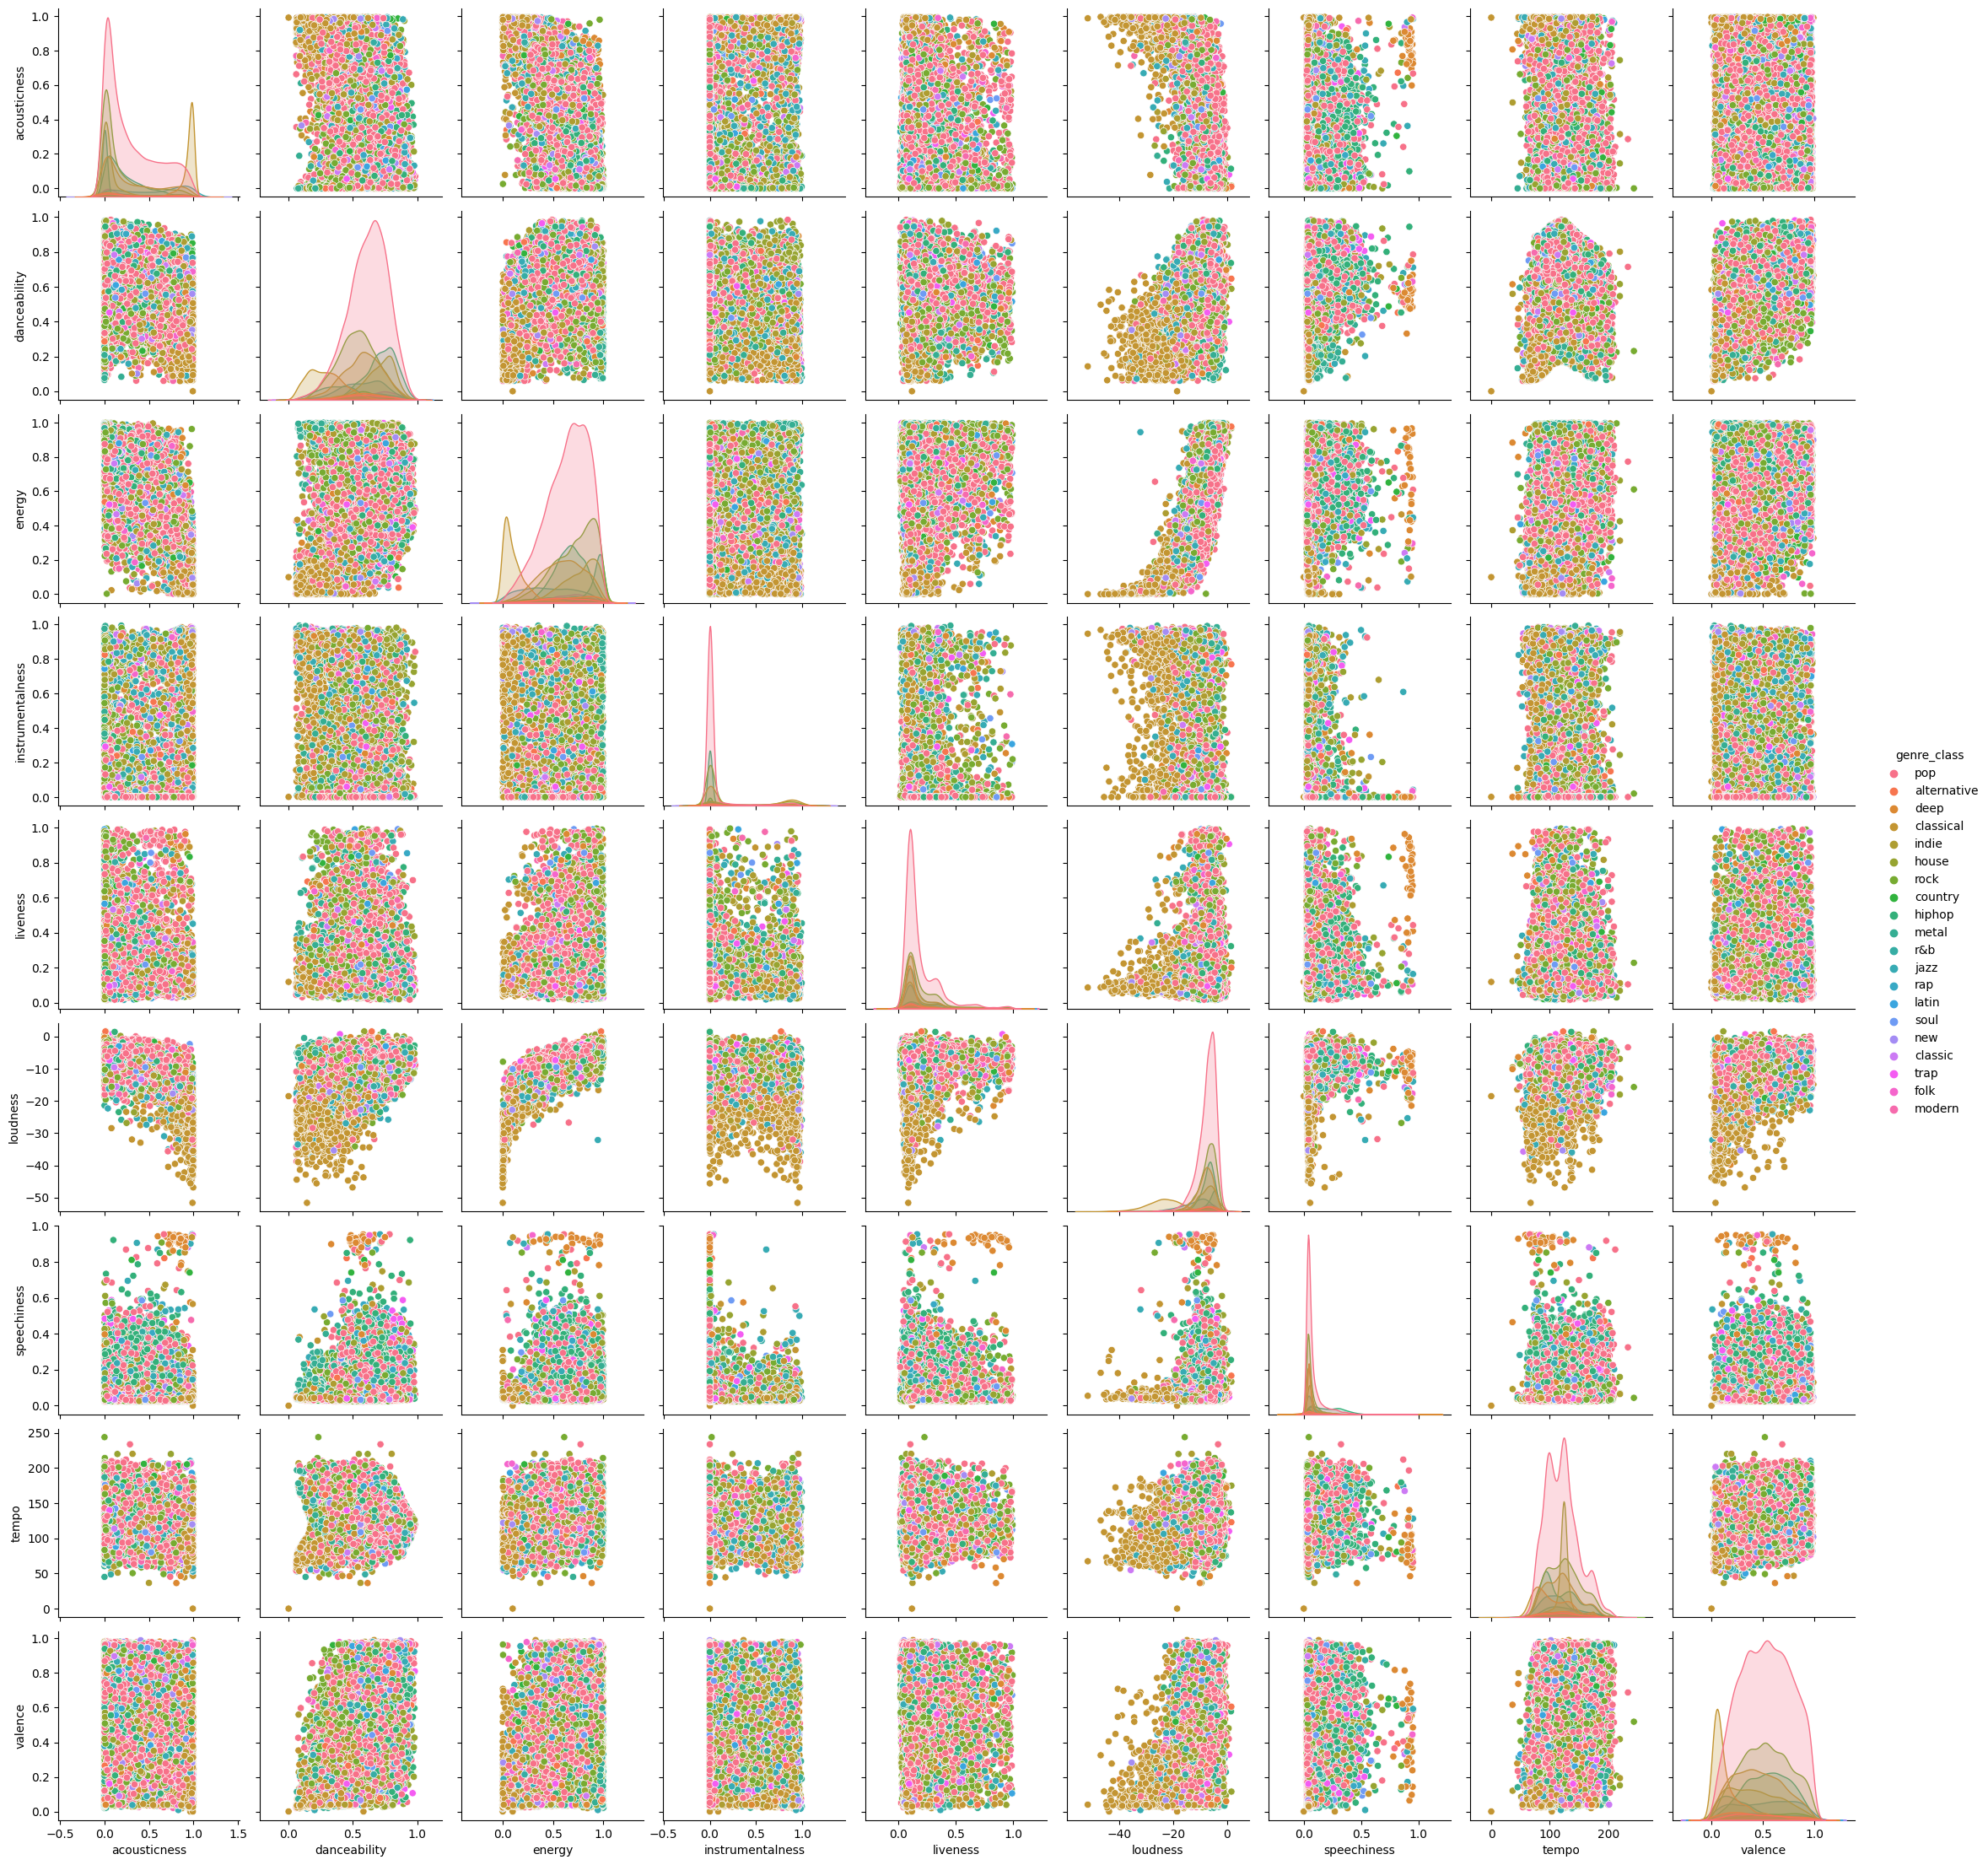

In [32]:
cols = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", 
        "loudness", "speechiness", "tempo", "valence", "genre_class"]
plot_df = df.query("genre_class != 'Other'")
plot_df = df[cols]
sns.pairplot(plot_df, hue="genre_class", palette="husl")

## ML

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

def create_features_processed_table(con: duckdb.DuckDBPyConnection):
    # Define X and y
    df = con.query("select * from features order by row_number").df()
    cols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
    y = df["genre_class"]
    X = df[cols]

    # Scale X
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Encode y
    encoder = LabelEncoder()
    y_encoded = encoder.fit_transform(y)

    # Concat DataFrames
    df_preprocessed = pd.concat([pd.DataFrame(X_scaled, columns=cols), pd.DataFrame(y_encoded, columns=["genre_class"])], axis=1)
    df_preprocessed = pd.concat([df[["id"]], df_preprocessed], axis=1)
  
    # Write to DuckDB
    con.execute("""
        drop table if exists features_preprocessed;
        create table features_preprocessed as
            select *, row_number() over (order by id) - 1 as row_number
            from df_preprocessed
            order by id
    """)

create_features_processed_table(con)

In [15]:
con.query("select * from features_preprocessed order by id").limit(5).df()

id  acousticness  danceability  energy  \
0  000RDCYioLteXcutOjeweY      0.058534      0.686552  0.7700   
1  000YQJ9lmNX02OxJ7hEh4R      0.009297      0.401416  0.9640   
2  001O0fWr1NyU700N1XzN5r      0.943775      0.364004  0.1640   
3  002F8HWG4UVMxby4Z2aOFI      0.902610      0.219414  0.0815   
4  004JmuI6jYQMYJCvNpQW9z      0.523092      0.651163  0.2490   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0          0.000000  0.082583  0.900254     0.196078  0.662696  0.844914   
1          0.000000  0.077678  0.857061     0.175439  0.695306  0.332326   
2          0.000002  0.670671  0.761029     0.048607  0.324990  0.206445   
3          0.004730  0.138138  0.700171     0.039525  0.552552  0.075227   
4          0.000000  0.427427  0.634513     0.993808  0.365456  0.413897   

   genre_class  row_number  
0            0           0  
1            0           1  
2           15           2  
3            0           3  
4            0           4

In [16]:
from sklearn.neighbors import KNeighborsClassifier

def get_model_knn() -> KNeighborsClassifier:
    # Check if model exists
    if Path(f"{data_path}/knn.pkl").exists():
        with open(Path(f"{data_path}/knn.pkl"), "rb") as f:
            return pickle.load(f)

    # Otherwise, create model
    df = con.query("select * from features_preprocessed order by id").df()
    X = df.drop(["id", "genre_class", "row_number"], axis=1)
    y = df["genre_class"]
    
    knn = KNeighborsClassifier(n_neighbors=5, algorithm="ball_tree")
    knn.fit(X,y)
    
    with open(Path(f"{data_path}/knn.pkl"), "wb") as f:
        pickle.dump(knn, f)

    return knn

knn = get_model_knn()

In [17]:
# Search for a song
def lookup_songs(con: duckdb.DuckDBPyConnection, lookup_query: str = "", genre_class: str = "") -> pd.DataFrame:
    sql = """
      select *
      from features
      where 
        regexp_matches(lower(song_detail), left($query, 50))
        AND 
        regexp_matches(lower(genre_class), $genre)
      order by id
      limit 10
    """
    return con.execute(sql, { "query": lookup_query.lower(), "genre": genre_class.lower() }).fetch_df()

lookup_songs(con, lookup_query="kid cudi", genre_class="")

id  acousticness  danceability  energy  \
0  5owJQbueZftSai4CuVlR9J       0.12300         0.767   0.722   
1  5xYC48nOppVemY6U5GRGTb       0.00147         0.546   0.916   
2  7KPr0YxECy4Q1k2F17Sa0Q       0.00158         0.546   0.899   
3  7rn94fZKrOwHunAgWtvJUs       0.00150         0.544   0.870   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.003270     0.118    -5.562       0.0601  130.023    0.962   
1          0.000004     0.251    -3.931       0.2550  129.986    0.380   
2          0.000006     0.229    -3.937       0.2330  130.003    0.470   
3          0.000003     0.246    -6.103       0.2600  129.984    0.502   

                  track_name   artist_name                 album_name  \
0  Day 'N' Nite - Radio Edit      Kid Cudi               Day 'N' Nite   
1  Memories (feat. Kid Cudi)  David Guetta              One More Love   
2  Memories (feat. Kid Cudi)  David Guetta  Memories (feat. Kid Cudi)   
3  Memories (feat. Kid Cudi)  David Guetta              One More Love   

                                song_detail        genres genre_class  \
0      Kid Cudi - Day 'N' Nite - Radio Edit  fidget house       house   
1  David Guetta - Memories (feat. Kid Cudi)       pop rap         pop   
2  David Guetta - Memories (feat. Kid Cudi)         Other       Other   
3  David Guetta - Memories (feat. Kid Cudi)         Other       Other   

   row_number  
0       75606  
1       77336  
2       95103  
3       99409

In [18]:
# Show song details
def show_song_details(con: duckdb.DuckDBPyConnection, track_id: str) -> pd.DataFrame:
    sql = """select * from features where id = $track_id"""
    return con.execute(sql, { "track_id": track_id}).fetch_df()


show_song_details(con, "5owJQbueZftSai4CuVlR9J")

id  acousticness  danceability  energy  \
0  5owJQbueZftSai4CuVlR9J         0.123         0.767   0.722   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0           0.00327     0.118    -5.562       0.0601  130.023    0.962   

                  track_name artist_name    album_name  \
0  Day 'N' Nite - Radio Edit    Kid Cudi  Day 'N' Nite   

                            song_detail        genres genre_class  row_number  
0  Kid Cudi - Day 'N' Nite - Radio Edit  fidget house       house       75606

In [19]:
def make_recommendations(con: duckdb.DuckDBPyConnection, track_id: str, n_neighbors: int = 2000) -> pd.DataFrame:
    # Get test data
    sql = """select * from features_preprocessed where id = $track_id order by id"""
    df_test = con.execute(sql, { "track_id": track_id}).fetch_df()
    X_test = df_test.drop(["id", "genre_class", "row_number"], axis=1)
    y_test = df_test["genre_class"]

    # Predict
    knn = get_model_knn()
    distances, indices = knn.kneighbors(X_test, n_neighbors=n_neighbors)

    # Lookup song details
    recommended = pd.DataFrame({"row_number": indices[0], "distance": distances[0]})
    sql = """
        select * from features
        where row_number in (select row_number from recommended)
    """
    details = con.query(sql).df()
    merged = pd.merge(recommended, details, left_on="row_number", right_on="row_number")
    
    merged = merged.filter(
        ["id", "song_detail", "genres", "genre_class",
          "row_number", "distance",
         "acousticness", "danceability", "energy", "instrumentalness",
         "liveness", "loudness", "speechiness", "tempo", "valence"]
    )

    genre = merged.iloc[0]["genre_class"]
    merged = merged.query("genre_class == @genre").head(10)
    return merged


In [20]:
make_recommendations(con, track_id="5owJQbueZftSai4CuVlR9J")

id                                    song_detail  \
0     5owJQbueZftSai4CuVlR9J           Kid Cudi - Day 'N' Nite - Radio Edit   
89    50SEeQXOJgaXPv2S0v7ded  Ofenbach - Paradise (feat. Benjamin Ingrosso)   
439   5EMwg8P4A3Qj7BPtau1Mn0                         Superfunk - Lucky Star   
755   6o4KTcGUoN8Xse2SNHorGU           Dennis Ferrer - Hey Hey - Radio Edit   
1029  45wneA2j0Z0WMnYNDO6Ad0                         Aaliyah - Back & Forth   
1057  49X0LAl6faAusYq02PRAY6                 Modjo - Lady - Hear Me Tonight   
1064  5fRvePkRGdpn2nKacG7I6d                    Mr. President - Coco Jamboo   
1258  0g3N3RCJohH1g7nPbplplT       DJEFF - Zugu Zugu (feat. Zakes Bantwini)   
1340  2eIhkkT5BfKNK1N5QqOrjG           Boy Kiss Girl - Ocean - Original Mix   
1379  3fAuMOdq8d44pW3ca1IX8D                       Various Artists - Savage   

                   genres genre_class  row_number  distance  acousticness  \
0            fidget house       house       75606  0.000000       0.12300   
89         tropical house       house       64904  0.122858       0.05490   
439           disco house       house       67807  0.159569       0.05160   
755            afro house       house       88328  0.177784       0.04330   
1029           acid house       house       53085  0.189133       0.06980   
1057          disco house       house       53814  0.190343       0.00793   
1064            hip house       house       73573  0.190687       0.07910   
1258           afro house       house        8706  0.197162       0.17100   
1340  deep tropical house       house       34033  0.199900       0.17900   
1379           bass house       house       47383  0.200743       0.00512   

      danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0            0.767   0.722          0.003270    0.1180    -5.562       0.0601   
89           0.759   0.804          0.000000    0.0782    -4.988       0.0319   
439          0.776   0.682          0.000237    0.2340    -7.426       0.0738   
755          0.728   0.868          0.000007    0.1000    -5.446       0.0557   
1029         0.706   0.727          0.000005    0.1150    -8.060       0.0317   
1057         0.720   0.808          0.029300    0.0634    -5.627       0.0379   
1064         0.832   0.838          0.000000    0.1520    -5.414       0.0421   
1258         0.776   0.852          0.004040    0.1630    -6.450       0.1440   
1340         0.714   0.760          0.000006    0.1270    -5.896       0.0299   
1379         0.693   0.850          0.000342    0.1290    -6.724       0.0621   

        tempo  valence  
0     130.023    0.962  
89    121.940    0.960  
439   125.857    0.901  
755   126.022    0.921  
1029   92.938    0.903  
1057  126.041    0.869  
1064  100.021    0.965  
1258  122.043    0.869  
1340  118.002    0.793  
1379  135.018    0.904

## Clean Up

In [21]:
con.close()